In [1]:
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import pylab as plb
plb.rcParams['font.size'] = 18
import pyod

from scipy import stats
from sklearn.metrics import mean_squared_error


df = pd.read_csv(r'coherence_purity_data.csv',sep = ';',dtype = float)




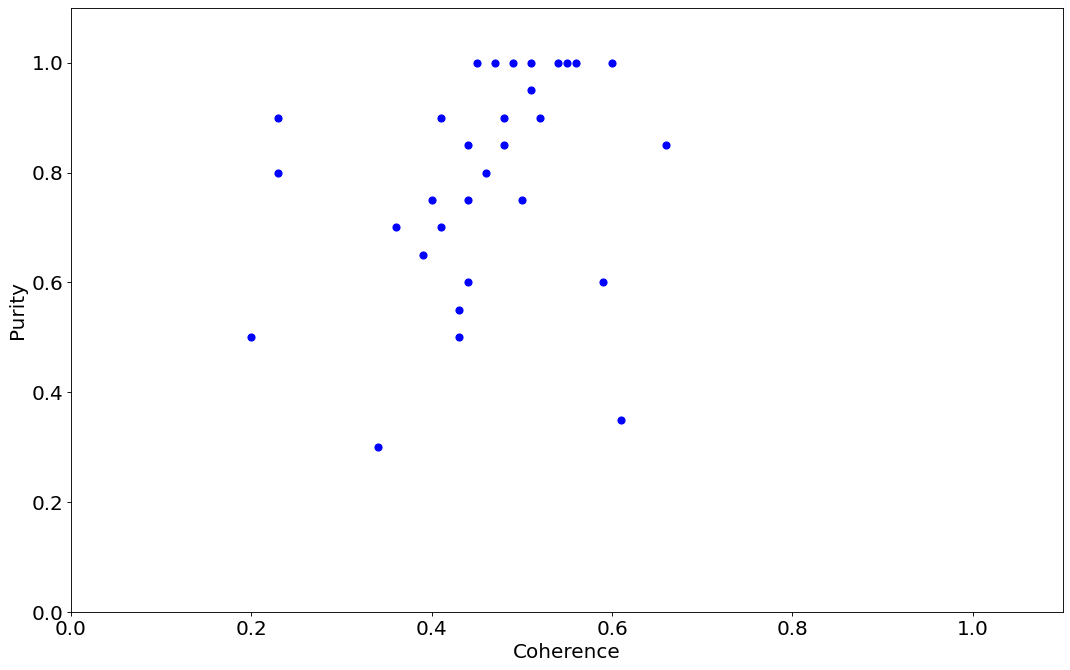

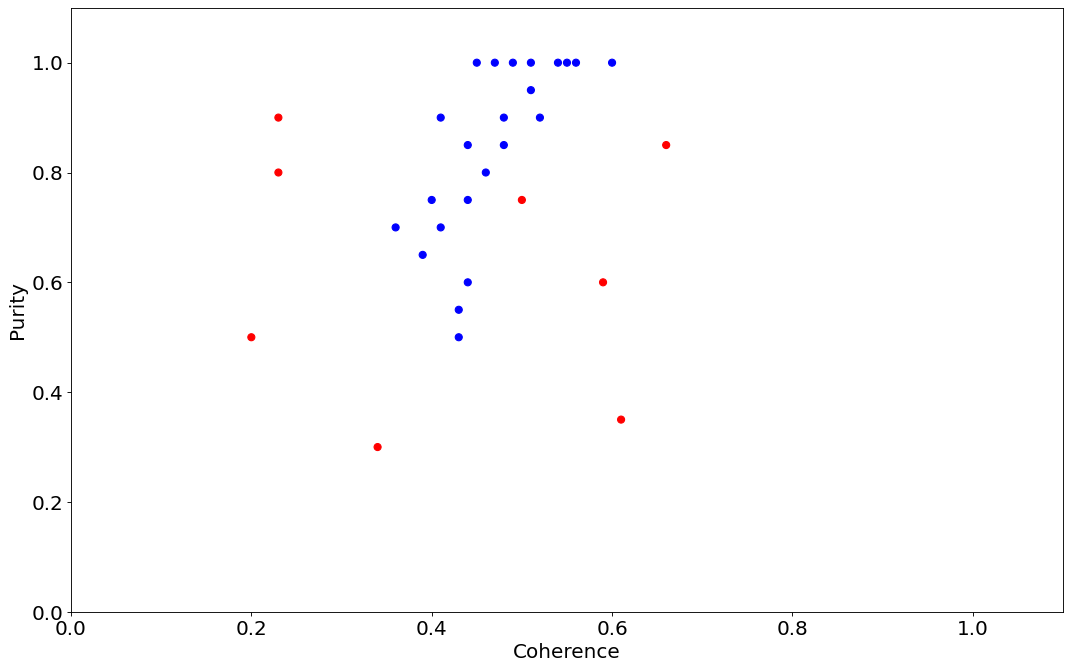

Pearsons r= 0.7   p-value= 0.00019
slope= 1.8942707194401922 
 intercept= -0.045708506450907405 
 slope stderr= 0.418766701528741 

mean_squared_error= 0.012734124682683801


<ipython-input-2-2da655b4ceba>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_ol['purity_predicted'] = linreg.intercept+linreg.slope*df_drop_ol['Coherence ']


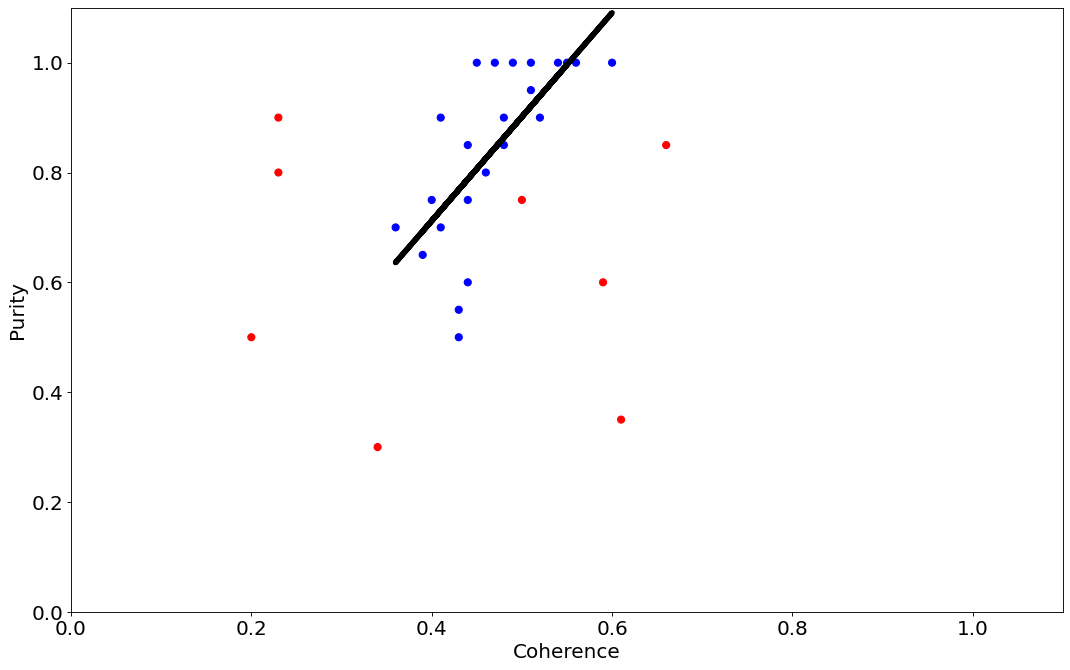

In [2]:
#---------------------------Plot---------------------------------
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x = df['Coherence '], y = df['Purity'], s = 40, c = 'b')
plt.gca().set(xlim=(0.0, 1.1), ylim=(0, 1.1),
              xlabel='Coherence', ylabel='Purity')
plt.xticks(fontsize=18); plt.yticks(fontsize=18)
plt.show()

#-----------------------Anomaly detection model------------------
from pyod.models.abod import ABOD

clf_name = 'ABOD'
clf = ABOD(contamination = 0.25)
clf.fit(df)
labels = clf.predict(df)
df['label']=labels
#---------------------------Plot---------------------------------
label_list = [0,1]
colors = ['blue','red']
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x = df['Coherence '], y = df['Purity'], s = 40, c = labels,
            cmap=matplotlib.colors.ListedColormap(colors))
plt.gca().set(xlim=(0.0, 1.1), ylim=(0, 1.1),
              xlabel='Coherence', ylabel='Purity')
plt.xticks(fontsize=18); plt.yticks(fontsize=18)
plt.show()

#-------------------------Correlation model----------------------
df_drop_ol=df[df['label']==0]
r, p = stats.pearsonr(df_drop_ol['Coherence '],df_drop_ol['Purity'])
print("Pearsons r=", round(r,2) ,' ', 'p-value=', round(p,5))

linreg=stats.linregress(df_drop_ol['Coherence '],df_drop_ol['Purity'])
print('slope=',linreg.slope,'\n',
      'intercept=',linreg.intercept,'\n',
      'slope stderr=', linreg.stderr,'\n',)
      # 'intercept stderr=', linreg.intercept_stderr)
df_drop_ol['purity_predicted'] = linreg.intercept+linreg.slope*df_drop_ol['Coherence ']
print('mean_squared_error=',mean_squared_error(y_true = df_drop_ol['Purity'],
                                               y_pred = df_drop_ol['purity_predicted']))

#---------------------------Plot---------------------------------
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x = df['Coherence '], y = df['Purity'], s = 40, c = labels,
            cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(df_drop_ol['Coherence '], df_drop_ol['purity_predicted'],
         c = 'k', linewidth = 5)
plt.gca().set(xlim=(0.0, 1.1), ylim=(0, 1.1),
              xlabel='Coherence', ylabel='Purity')
plt.xticks(fontsize=18); plt.yticks(fontsize=18)
plt.show()


In [3]:
#PU hyperparams
print('model purity = ',linreg.intercept+linreg.slope*0.68,'\n')
print('real putiry = ',0.66,'\n')
#spr hyperparams
print('model purity = ',linreg.intercept+linreg.slope*0.72)

model purity =  1.2423955827684234 

real putiry =  0.66 

model purity =  1.3181664115460308


In [4]:
0.68/0.66*0.72

0.7418181818181818